### Signature Extraction

In [12]:
import cv2
import os

def processImage(imagePath, k):
    # Read and convert the image to grayscale
    img = cv2.imread(imagePath)
    grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply thresholding to convert the image to binary
    _, thresholdImage = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)
    
    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresholdImage, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    j = 0
    minAreaThreshold = 300000
    smallAreaThreshold = 10000
    maxAreaThreshold = 1000000
    
    # Define the single output directory to store all extracted signatures
    outputDirectory = 'D:/FAST_NUCES/Fall 2024/Gen-AI/Assignments/Assignment_1_upload/Assignment_1_upload/preprocessedImages/all__Signatures/'
    if not os.path.exists(outputDirectory):
        os.makedirs(outputDirectory)
    
    for contour in contours:
        # Skip the first contour which represents the entire image
        if j == 0:
            j += 1
            continue
        
        # Calculate contour area and filter based on size
        area = cv2.contourArea(contour)
        approximatedContour = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
        
        # If the contour is a quadrilateral, process it
        if len(approximatedContour) == 4:
            if smallAreaThreshold < area < minAreaThreshold:
                k += 1
            if area < minAreaThreshold or area > maxAreaThreshold:
                continue
            
            # Crop the region of interest based on the bounding box
            x, y, w, h = cv2.boundingRect(contour)
            croppedImg = img[y:y+h, x:x+w]
            
            # Save the cropped image in the single output directory
            cv2.imwrite(f'{outputDirectory}/signature_{k}.png', croppedImg)
            k += 1

    return k

# Main function to process all images in a folder
def processFolder(folderPath):
    k = 0
    for file in os.listdir(folderPath):
        if file.endswith(".jpg") or file.endswith(".png"):
            imagePath = os.path.join(folderPath, file)
            print(f"Processing: {imagePath}")
            k = processImage(imagePath, k)

# Process all images in the specified directory
processFolder('D:/FAST_NUCES/Fall 2024/Gen-AI/Assignments/Assignment__01/Assignment_1_upload/Data')


Processing: D:/FAST_NUCES/Fall 2024/Gen-AI/Assignments/Assignment__01/Assignment_1_upload/Data\20240904_083201.jpg
Processing: D:/FAST_NUCES/Fall 2024/Gen-AI/Assignments/Assignment__01/Assignment_1_upload/Data\20240904_083217.jpg
Processing: D:/FAST_NUCES/Fall 2024/Gen-AI/Assignments/Assignment__01/Assignment_1_upload/Data\20240904_083233.jpg
Processing: D:/FAST_NUCES/Fall 2024/Gen-AI/Assignments/Assignment__01/Assignment_1_upload/Data\20240904_083248.jpg
Processing: D:/FAST_NUCES/Fall 2024/Gen-AI/Assignments/Assignment__01/Assignment_1_upload/Data\20240904_083305.jpg
Processing: D:/FAST_NUCES/Fall 2024/Gen-AI/Assignments/Assignment__01/Assignment_1_upload/Data\20240904_083320.jpg
Processing: D:/FAST_NUCES/Fall 2024/Gen-AI/Assignments/Assignment__01/Assignment_1_upload/Data\20240904_083334.jpg
Processing: D:/FAST_NUCES/Fall 2024/Gen-AI/Assignments/Assignment__01/Assignment_1_upload/Data\20240904_083350.jpg
Processing: D:/FAST_NUCES/Fall 2024/Gen-AI/Assignments/Assignment__01/Assignment

### Data Augmentation

In [15]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image

# Set the directory containing the original images
directory = r'D:\FAST_NUCES\Fall 2024\Gen-AI\Assignments\Assignment__02\Q_01\1'

# Create an instance of ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=10,      # Random rotation in degrees
    width_shift_range=0.1,  # Random horizontal shift
    height_shift_range=0.1, # Random vertical shift
    shear_range=0.1,        # Shear intensity
    zoom_range=0.1,         # Random zoom
    horizontal_flip=False,   # Do not flip images horizontally
    fill_mode='nearest'     # Fill in new pixels
)

# Process each image in the specified directory
for filename in os.listdir(directory):
    if filename.endswith('.png') or filename.endswith('.jpg'):  # Check for image files
        img_path = os.path.join(directory, filename)  # Get the full image path
        img = Image.open(img_path)  # Open the image
        img_array = np.array(img)  # Convert to NumPy array

        # Reshape the image to have a batch size of 1
        img_array = img_array.reshape((1,) + img_array.shape) 

        # Generate and save augmented images
        i = 0
        print(f'Augmenting image: {filename}')  # Debugging statement
        for batch in datagen.flow(img_array, batch_size=1, save_to_dir=directory, 
                                   save_prefix='aug', save_format='png'):
            i += 1
            print(f'Saving augmented image {i} for {filename}')  # Debugging statement
            if i >= 5:  # Generate 5 augmented images for each original image
                break
        print(f'Done augmenting: {filename}')  # Debugging statement


Augmenting image: 1.png
Saving augmented image 1 for 1.png
Saving augmented image 2 for 1.png
Saving augmented image 3 for 1.png
Saving augmented image 4 for 1.png
Saving augmented image 5 for 1.png
Done augmenting: 1.png
Augmenting image: 10.png
Saving augmented image 1 for 10.png
Saving augmented image 2 for 10.png
Saving augmented image 3 for 10.png
Saving augmented image 4 for 10.png
Saving augmented image 5 for 10.png
Done augmenting: 10.png
Augmenting image: 100.png
Saving augmented image 1 for 100.png
Saving augmented image 2 for 100.png
Saving augmented image 3 for 100.png
Saving augmented image 4 for 100.png
Saving augmented image 5 for 100.png
Done augmenting: 100.png
Augmenting image: 101.png
Saving augmented image 1 for 101.png
Saving augmented image 2 for 101.png
Saving augmented image 3 for 101.png
Saving augmented image 4 for 101.png
Saving augmented image 5 for 101.png
Done augmenting: 101.png
Augmenting image: 102.png
Saving augmented image 1 for 102.png
Saving augment

Saving augmented image 1 for 130.png
Saving augmented image 2 for 130.png
Saving augmented image 3 for 130.png
Saving augmented image 4 for 130.png
Saving augmented image 5 for 130.png
Done augmenting: 130.png
Augmenting image: 131.png
Saving augmented image 1 for 131.png
Saving augmented image 2 for 131.png
Saving augmented image 3 for 131.png
Saving augmented image 4 for 131.png
Saving augmented image 5 for 131.png
Done augmenting: 131.png
Augmenting image: 132.png
Saving augmented image 1 for 132.png
Saving augmented image 2 for 132.png
Saving augmented image 3 for 132.png
Saving augmented image 4 for 132.png
Saving augmented image 5 for 132.png
Done augmenting: 132.png
Augmenting image: 133.png
Saving augmented image 1 for 133.png
Saving augmented image 2 for 133.png
Saving augmented image 3 for 133.png
Saving augmented image 4 for 133.png
Saving augmented image 5 for 133.png
Done augmenting: 133.png
Augmenting image: 134.png
Saving augmented image 1 for 134.png
Saving augmented im

Saving augmented image 1 for 162.png
Saving augmented image 2 for 162.png
Saving augmented image 3 for 162.png
Saving augmented image 4 for 162.png
Saving augmented image 5 for 162.png
Done augmenting: 162.png
Augmenting image: 163.png
Saving augmented image 1 for 163.png
Saving augmented image 2 for 163.png
Saving augmented image 3 for 163.png
Saving augmented image 4 for 163.png
Saving augmented image 5 for 163.png
Done augmenting: 163.png
Augmenting image: 164.png
Saving augmented image 1 for 164.png
Saving augmented image 2 for 164.png
Saving augmented image 3 for 164.png
Saving augmented image 4 for 164.png
Saving augmented image 5 for 164.png
Done augmenting: 164.png
Augmenting image: 165.png
Saving augmented image 1 for 165.png
Saving augmented image 2 for 165.png
Saving augmented image 3 for 165.png
Saving augmented image 4 for 165.png
Saving augmented image 5 for 165.png
Done augmenting: 165.png
Augmenting image: 166.png
Saving augmented image 1 for 166.png
Saving augmented im

Saving augmented image 1 for 194.png
Saving augmented image 2 for 194.png
Saving augmented image 3 for 194.png
Saving augmented image 4 for 194.png
Saving augmented image 5 for 194.png
Done augmenting: 194.png
Augmenting image: 195.png
Saving augmented image 1 for 195.png
Saving augmented image 2 for 195.png
Saving augmented image 3 for 195.png
Saving augmented image 4 for 195.png
Saving augmented image 5 for 195.png
Done augmenting: 195.png
Augmenting image: 196.png
Saving augmented image 1 for 196.png
Saving augmented image 2 for 196.png
Saving augmented image 3 for 196.png
Saving augmented image 4 for 196.png
Saving augmented image 5 for 196.png
Done augmenting: 196.png
Augmenting image: 197.png
Saving augmented image 1 for 197.png
Saving augmented image 2 for 197.png
Saving augmented image 3 for 197.png
Saving augmented image 4 for 197.png
Saving augmented image 5 for 197.png
Done augmenting: 197.png
Augmenting image: 198.png
Saving augmented image 1 for 198.png
Saving augmented im

Saving augmented image 1 for 225.png
Saving augmented image 2 for 225.png
Saving augmented image 3 for 225.png
Saving augmented image 4 for 225.png
Saving augmented image 5 for 225.png
Done augmenting: 225.png
Augmenting image: 226.png
Saving augmented image 1 for 226.png
Saving augmented image 2 for 226.png
Saving augmented image 3 for 226.png
Saving augmented image 4 for 226.png
Saving augmented image 5 for 226.png
Done augmenting: 226.png
Augmenting image: 227.png
Saving augmented image 1 for 227.png
Saving augmented image 2 for 227.png
Saving augmented image 3 for 227.png
Saving augmented image 4 for 227.png
Saving augmented image 5 for 227.png
Done augmenting: 227.png
Augmenting image: 228.png
Saving augmented image 1 for 228.png
Saving augmented image 2 for 228.png
Saving augmented image 3 for 228.png
Saving augmented image 4 for 228.png
Saving augmented image 5 for 228.png
Done augmenting: 228.png
Augmenting image: 229.png
Saving augmented image 1 for 229.png
Saving augmented im

Saving augmented image 1 for 257.png
Saving augmented image 2 for 257.png
Saving augmented image 3 for 257.png
Saving augmented image 4 for 257.png
Saving augmented image 5 for 257.png
Done augmenting: 257.png
Augmenting image: 258.png
Saving augmented image 1 for 258.png
Saving augmented image 2 for 258.png
Saving augmented image 3 for 258.png
Saving augmented image 4 for 258.png
Saving augmented image 5 for 258.png
Done augmenting: 258.png
Augmenting image: 259.png
Saving augmented image 1 for 259.png
Saving augmented image 2 for 259.png
Saving augmented image 3 for 259.png
Saving augmented image 4 for 259.png
Saving augmented image 5 for 259.png
Done augmenting: 259.png
Augmenting image: 26.png
Saving augmented image 1 for 26.png
Saving augmented image 2 for 26.png
Saving augmented image 3 for 26.png
Saving augmented image 4 for 26.png
Saving augmented image 5 for 26.png
Done augmenting: 26.png
Augmenting image: 260.png
Saving augmented image 1 for 260.png
Saving augmented image 2 f

Saving augmented image 1 for 289.png
Saving augmented image 2 for 289.png
Saving augmented image 3 for 289.png
Saving augmented image 4 for 289.png
Saving augmented image 5 for 289.png
Done augmenting: 289.png
Augmenting image: 29.png
Saving augmented image 1 for 29.png
Saving augmented image 2 for 29.png
Saving augmented image 3 for 29.png
Saving augmented image 4 for 29.png
Saving augmented image 5 for 29.png
Done augmenting: 29.png
Augmenting image: 290.png
Saving augmented image 1 for 290.png
Saving augmented image 2 for 290.png
Saving augmented image 3 for 290.png
Saving augmented image 4 for 290.png
Saving augmented image 5 for 290.png
Done augmenting: 290.png
Augmenting image: 291.png
Saving augmented image 1 for 291.png
Saving augmented image 2 for 291.png
Saving augmented image 3 for 291.png
Saving augmented image 4 for 291.png
Saving augmented image 5 for 291.png
Done augmenting: 291.png
Augmenting image: 292.png
Saving augmented image 1 for 292.png
Saving augmented image 2 f

Saving augmented image 1 for 32.png
Saving augmented image 2 for 32.png
Saving augmented image 3 for 32.png
Saving augmented image 4 for 32.png
Saving augmented image 5 for 32.png
Done augmenting: 32.png
Augmenting image: 320.png
Saving augmented image 1 for 320.png
Saving augmented image 2 for 320.png
Saving augmented image 3 for 320.png
Saving augmented image 4 for 320.png
Saving augmented image 5 for 320.png
Done augmenting: 320.png
Augmenting image: 321.png
Saving augmented image 1 for 321.png
Saving augmented image 2 for 321.png
Saving augmented image 3 for 321.png
Saving augmented image 4 for 321.png
Saving augmented image 5 for 321.png
Done augmenting: 321.png
Augmenting image: 322.png
Saving augmented image 1 for 322.png
Saving augmented image 2 for 322.png
Saving augmented image 3 for 322.png
Saving augmented image 4 for 322.png
Saving augmented image 5 for 322.png
Done augmenting: 322.png
Augmenting image: 323.png
Saving augmented image 1 for 323.png
Saving augmented image 2 

Saving augmented image 1 for 351.png
Saving augmented image 2 for 351.png
Saving augmented image 3 for 351.png
Saving augmented image 4 for 351.png
Saving augmented image 5 for 351.png
Done augmenting: 351.png
Augmenting image: 352.png
Saving augmented image 1 for 352.png
Saving augmented image 2 for 352.png
Saving augmented image 3 for 352.png
Saving augmented image 4 for 352.png
Saving augmented image 5 for 352.png
Done augmenting: 352.png
Augmenting image: 353.png
Saving augmented image 1 for 353.png
Saving augmented image 2 for 353.png
Saving augmented image 3 for 353.png
Saving augmented image 4 for 353.png
Saving augmented image 5 for 353.png
Done augmenting: 353.png
Augmenting image: 354.png
Saving augmented image 1 for 354.png
Saving augmented image 2 for 354.png
Saving augmented image 3 for 354.png
Saving augmented image 4 for 354.png
Saving augmented image 5 for 354.png
Done augmenting: 354.png
Augmenting image: 355.png
Saving augmented image 1 for 355.png
Saving augmented im

Saving augmented image 1 for 383.png
Saving augmented image 2 for 383.png
Saving augmented image 3 for 383.png
Saving augmented image 4 for 383.png
Saving augmented image 5 for 383.png
Done augmenting: 383.png
Augmenting image: 384.png
Saving augmented image 1 for 384.png
Saving augmented image 2 for 384.png
Saving augmented image 3 for 384.png
Saving augmented image 4 for 384.png
Saving augmented image 5 for 384.png
Done augmenting: 384.png
Augmenting image: 385.png
Saving augmented image 1 for 385.png
Saving augmented image 2 for 385.png
Saving augmented image 3 for 385.png
Saving augmented image 4 for 385.png
Saving augmented image 5 for 385.png
Done augmenting: 385.png
Augmenting image: 386.png
Saving augmented image 1 for 386.png
Saving augmented image 2 for 386.png
Saving augmented image 3 for 386.png
Saving augmented image 4 for 386.png
Saving augmented image 5 for 386.png
Done augmenting: 386.png
Augmenting image: 387.png
Saving augmented image 1 for 387.png
Saving augmented im

Saving augmented image 1 for 414.png
Saving augmented image 2 for 414.png
Saving augmented image 3 for 414.png
Saving augmented image 4 for 414.png
Saving augmented image 5 for 414.png
Done augmenting: 414.png
Augmenting image: 415.png
Saving augmented image 1 for 415.png
Saving augmented image 2 for 415.png
Saving augmented image 3 for 415.png
Saving augmented image 4 for 415.png
Saving augmented image 5 for 415.png
Done augmenting: 415.png
Augmenting image: 416.png
Saving augmented image 1 for 416.png
Saving augmented image 2 for 416.png
Saving augmented image 3 for 416.png
Saving augmented image 4 for 416.png
Saving augmented image 5 for 416.png
Done augmenting: 416.png
Augmenting image: 417.png
Saving augmented image 1 for 417.png
Saving augmented image 2 for 417.png
Saving augmented image 3 for 417.png
Saving augmented image 4 for 417.png
Saving augmented image 5 for 417.png
Done augmenting: 417.png
Augmenting image: 418.png
Saving augmented image 1 for 418.png
Saving augmented im

Saving augmented image 1 for 446.png
Saving augmented image 2 for 446.png
Saving augmented image 3 for 446.png
Saving augmented image 4 for 446.png
Saving augmented image 5 for 446.png
Done augmenting: 446.png
Augmenting image: 447.png
Saving augmented image 1 for 447.png
Saving augmented image 2 for 447.png
Saving augmented image 3 for 447.png
Saving augmented image 4 for 447.png
Saving augmented image 5 for 447.png
Done augmenting: 447.png
Augmenting image: 448.png
Saving augmented image 1 for 448.png
Saving augmented image 2 for 448.png
Saving augmented image 3 for 448.png
Saving augmented image 4 for 448.png
Saving augmented image 5 for 448.png
Done augmenting: 448.png
Augmenting image: 449.png
Saving augmented image 1 for 449.png
Saving augmented image 2 for 449.png
Saving augmented image 3 for 449.png
Saving augmented image 4 for 449.png
Saving augmented image 5 for 449.png
Done augmenting: 449.png
Augmenting image: 45.png
Saving augmented image 1 for 45.png
Saving augmented imag

Saving augmented image 1 for 478.png
Saving augmented image 2 for 478.png
Saving augmented image 3 for 478.png
Saving augmented image 4 for 478.png
Saving augmented image 5 for 478.png
Done augmenting: 478.png
Augmenting image: 479.png
Saving augmented image 1 for 479.png
Saving augmented image 2 for 479.png
Saving augmented image 3 for 479.png
Saving augmented image 4 for 479.png
Saving augmented image 5 for 479.png
Done augmenting: 479.png
Augmenting image: 48.png
Saving augmented image 1 for 48.png
Saving augmented image 2 for 48.png
Saving augmented image 3 for 48.png
Saving augmented image 4 for 48.png
Saving augmented image 5 for 48.png
Done augmenting: 48.png
Augmenting image: 480.png
Saving augmented image 1 for 480.png
Saving augmented image 2 for 480.png
Saving augmented image 3 for 480.png
Saving augmented image 4 for 480.png
Saving augmented image 5 for 480.png
Done augmenting: 480.png
Augmenting image: 481.png
Saving augmented image 1 for 481.png
Saving augmented image 2 f

Saving augmented image 1 for 509.png
Saving augmented image 2 for 509.png
Saving augmented image 3 for 509.png
Saving augmented image 4 for 509.png
Saving augmented image 5 for 509.png
Done augmenting: 509.png
Augmenting image: 51.png
Saving augmented image 1 for 51.png
Saving augmented image 2 for 51.png
Saving augmented image 3 for 51.png
Saving augmented image 4 for 51.png
Saving augmented image 5 for 51.png
Done augmenting: 51.png
Augmenting image: 510.png
Saving augmented image 1 for 510.png
Saving augmented image 2 for 510.png
Saving augmented image 3 for 510.png
Saving augmented image 4 for 510.png
Saving augmented image 5 for 510.png
Done augmenting: 510.png
Augmenting image: 511.png
Saving augmented image 1 for 511.png
Saving augmented image 2 for 511.png
Saving augmented image 3 for 511.png
Saving augmented image 4 for 511.png
Saving augmented image 5 for 511.png
Done augmenting: 511.png
Augmenting image: 512.png
Saving augmented image 1 for 512.png
Saving augmented image 2 f

Saving augmented image 1 for 540.png
Saving augmented image 2 for 540.png
Saving augmented image 3 for 540.png
Saving augmented image 4 for 540.png
Saving augmented image 5 for 540.png
Done augmenting: 540.png
Augmenting image: 541.png
Saving augmented image 1 for 541.png
Saving augmented image 2 for 541.png
Saving augmented image 3 for 541.png
Saving augmented image 4 for 541.png
Saving augmented image 5 for 541.png
Done augmenting: 541.png
Augmenting image: 542.png
Saving augmented image 1 for 542.png
Saving augmented image 2 for 542.png
Saving augmented image 3 for 542.png
Saving augmented image 4 for 542.png
Saving augmented image 5 for 542.png
Done augmenting: 542.png
Augmenting image: 543.png
Saving augmented image 1 for 543.png
Saving augmented image 2 for 543.png
Saving augmented image 3 for 543.png
Saving augmented image 4 for 543.png
Saving augmented image 5 for 543.png
Done augmenting: 543.png
Augmenting image: 544.png
Saving augmented image 1 for 544.png
Saving augmented im

Saving augmented image 1 for 81.png
Saving augmented image 2 for 81.png
Saving augmented image 3 for 81.png
Saving augmented image 4 for 81.png
Saving augmented image 5 for 81.png
Done augmenting: 81.png
Augmenting image: 82.png
Saving augmented image 1 for 82.png
Saving augmented image 2 for 82.png
Saving augmented image 3 for 82.png
Saving augmented image 4 for 82.png
Saving augmented image 5 for 82.png
Done augmenting: 82.png
Augmenting image: 83.png
Saving augmented image 1 for 83.png
Saving augmented image 2 for 83.png
Saving augmented image 3 for 83.png
Saving augmented image 4 for 83.png
Saving augmented image 5 for 83.png
Done augmenting: 83.png
Augmenting image: 84.png
Saving augmented image 1 for 84.png
Saving augmented image 2 for 84.png
Saving augmented image 3 for 84.png
Saving augmented image 4 for 84.png
Saving augmented image 5 for 84.png
Done augmenting: 84.png
Augmenting image: 85.png
Saving augmented image 1 for 85.png
Saving augmented image 2 for 85.png
Saving augme

In [3]:
import os

# Directory containing the image files
directory = r'D:\FAST_NUCES\Fall 2024\Gen-AI\Assignments\Assignment__02\Q_01\1'

# Get all the files in the directory
files = os.listdir(directory)

# Sort the files to ensure correct ordering (optional but recommended)
files.sort()

# Initialize counter for renaming files
counter = 1

# Loop through each file in the directory
for filename in files:
    # Get the file extension
    file_ext = os.path.splitext(filename)[1]
    
    # Define the new filename, e.g., '1.jpg', '2.png'
    new_filename = f"{counter}{file_ext}"
    
    # Build the full old and new file paths
    old_file_path = os.path.join(directory, filename)
    new_file_path = os.path.join(directory, new_filename)
    
    # Rename the file
    os.rename(old_file_path, new_file_path)
    
    # Increment the counter
    counter += 1

print("Renaming completed successfully!")


Renaming completed successfully!


### Custom VAE

In [2]:
import os
from PIL import Image
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F

# VAE Model
class VAE(nn.Module):
    def __init__(self, input_dim=64*64, latent_dim=2, hidden_dim=400):
        super(VAE, self).__init__()
        
        # Encoder
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)  # Latent mean
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)  # Latent variance
        
        # Decoder
        self.fc3 = nn.Linear(latent_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, input_dim)
    
    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        mu = self.fc_mu(h1)
        logvar = self.fc_logvar(h1)
        return mu, logvar
    
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))  # Sigmoid to ensure values between 0 and 1 for reconstruction
    
    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

# Loss Function
def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x, reduction='sum')  # Reconstruction loss
    # KL Divergence to regularize the latent space
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

# Training the VAE
def train_vae(model, optimizer, dataloader, epochs=10):
#     optimizer = optim.Adam(model.parameters(), lr=lr)
    model.train()
    
    for epoch in range(epochs):
        train_loss = 0
        for batch_idx, data in enumerate(dataloader):
            data = data.view(-1, 4096)  # Flatten the image (Assuming 128x128)
            data = (data + 1) / 2
            optimizer.zero_grad()
            recon_batch, mu, logvar = model(data)
            loss = loss_function(recon_batch, data, mu, logvar)
            loss.backward()
            train_loss += loss.item()
            optimizer.step()
        
        print(f'Epoch {epoch+1}, Loss: {train_loss / len(dataloader.dataset)}')

# Dataset class for loading images
class SignatureDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.image_names = os.listdir(image_dir)
        self.transform = transform

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_names[idx])
        image = Image.open(img_path).convert("L")  # Convert to grayscale

        if self.transform:
            image = self.transform(image)

        return image

# Define image transforms (resize, normalize, etc.)
transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images to 28x28 (same size as MNIST)
    transforms.ToTensor(),  # Convert PIL images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the pixel values between -1 and 1
])

# Load the dataset
def load_data(image_dir, batch_size=64):
    dataset = SignatureDataset(image_dir=image_dir, transform=transform)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

directory = r'D:\FAST_NUCES\Fall 2024\Gen-AI\Assignments\Assignment__02\Q_01\1'

# Assuming your images are in the folder "signature_images/"
dataloader = load_data(directory, batch_size=64)

# Instantiate the model
vae = VAE(input_dim=64*64, latent_dim=2, hidden_dim=400)

optimizer = optim.Adam(vae.parameters(), lr=1e-3)

# Train the VAE
train_vae(vae, optimizer, dataloader, epochs=150)

# Save the model and optimizer state
model_dir = r'D:\FAST_NUCES\Fall 2024\Gen-AI\Assignments\Assignment__02\Q_01\models'
os.makedirs(model_dir, exist_ok=True)  # Create directory if it doesn't exist
model_save_path = os.path.join(model_dir, 'vae_model.pth')
torch.save({
    'model_state_dict': vae.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
}, model_save_path)
print(f'Model and optimizer state saved to {model_save_path}')

Epoch 1, Loss: 2758.207825246431
Epoch 2, Loss: 2725.3369147263766
Epoch 3, Loss: 2707.9852991162475
Epoch 4, Loss: 2702.180261089395
Epoch 5, Loss: 2697.759655421482
Epoch 6, Loss: 2696.294761216859
Epoch 7, Loss: 2693.2044261981646
Epoch 8, Loss: 2692.3976567811014
Epoch 9, Loss: 2691.144252421822
Epoch 10, Loss: 2690.9610384092452
Epoch 11, Loss: 2690.1234385622024
Epoch 12, Loss: 2690.8972478331066
Epoch 13, Loss: 2689.431663196805
Epoch 14, Loss: 2690.771663621686
Epoch 15, Loss: 2689.11128696465
Epoch 16, Loss: 2689.476838672672
Epoch 17, Loss: 2688.7509931594154
Epoch 18, Loss: 2688.8693809483343
Epoch 19, Loss: 2687.6984672416725
Epoch 20, Loss: 2687.1057157121004
Epoch 21, Loss: 2687.2257499150237
Epoch 22, Loss: 2686.587265253229
Epoch 23, Loss: 2686.6478426665535
Epoch 24, Loss: 2686.562515933039
Epoch 25, Loss: 2686.0655007222977
Epoch 26, Loss: 2685.981082171992
Epoch 27, Loss: 2685.8869179129842
Epoch 28, Loss: 2685.5278031526173
Epoch 29, Loss: 2686.537033693066
Epoch 30

### Custom VAE Testing

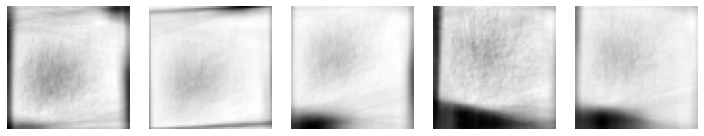

In [3]:
import matplotlib.pyplot as plt

def generate_fake_signatures(vae, num_samples=5):
    with torch.no_grad():
        z = torch.randn(num_samples, 2)  # Sample from latent space
        samples = vae.decode(z).view(-1, 64, 64)  # Reshape back to image size
    return samples

# Generate fake signatures
fake_signatures = generate_fake_signatures(vae, num_samples=5)

# Function to plot images
def plot_images(images, ncols=5):
    n_images = len(images)
    nrows = (n_images + ncols - 1) // ncols  # Calculate number of rows needed

    plt.figure(figsize=(ncols * 2, nrows * 2))  # Set figure size
    for i in range(n_images):
        plt.subplot(nrows, ncols, i + 1)
        plt.imshow(images[i].cpu(), cmap='gray')  # Use 'gray' colormap for grayscale images
        plt.axis('off')  # Turn off axes
    plt.tight_layout()
    plt.show()

# Plot the generated fake signatures
plot_images(fake_signatures)